In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dropout, Dense, Conv2DTranspose
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
folder = 'train'
images = []
y_idx = []
k = 0
for i in os.listdir(folder):
    for filename in os.listdir(os.path.join(folder,i)):
        img = cv2.imread(os.path.join(os.path.join(folder,i),filename))
        if img is not None:
            images.append(img)
            y_idx.append(k)
    k = k + 1


n_train = len(images)
x_train = np.zeros((n_train, 64, 64, 3))
y_train = np.zeros((n_train, 1))

for i in range(n_train):
    x_train[i,:,:,:] = images[i]
    y_train[i] = y_idx[i]

In [3]:
folder = 'test'
images = []
y_idx = []
k = 0
for i in os.listdir(folder):
    for filename in os.listdir(os.path.join(folder,i)):
        img = cv2.imread(os.path.join(os.path.join(folder,i),filename))
        if img is not None:
            images.append(img)
            y_idx.append(k)
    k = k + 1
    

n_test = len(images)
x_test = np.zeros((n_test, 64, 64, 3))
y_test = np.zeros((n_test, 1))


for i in range(n_test):
    x_test[i,:,:,:] = images[i]
    y_test[i] = y_idx[i]

In [4]:
num_class = 10
x_train = x_train.astype('float64') # change integers to 64-bit
#floating point numbers
x_test = x_test.astype('float64')
x_train /= 255 # normalize the input
x_test /= 255

y_train = to_categorical(y_train, num_class)
y_test = to_categorical(y_test, num_class)

In [5]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (10130, 64, 64, 3)
y_train shape: (10130, 10)
x_test shape: (1404, 64, 64, 3)
y_test shape: (1404, 10)


In [6]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(64,64,3)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(8, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same'))

In [7]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 8)         1160      
                                                                 
 conv2d_transpose (Conv2DTr  (None, 60, 60, 8)         584       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 62, 62, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 64, 64, 32)        4

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                validation_split=0.2)

Epoch 1/10


64/64 [==============================] - 41s 590ms/step - loss: 0.6182 - accuracy: 0.5472 - val_loss: 0.5180 - val_accuracy: 0.6263
Epoch 2/10
64/64 [==============================] - 36s 569ms/step - loss: 0.5557 - accuracy: 0.7041 - val_loss: 0.4941 - val_accuracy: 0.7014
Epoch 3/10
64/64 [==============================] - 35s 547ms/step - loss: 0.5484 - accuracy: 0.7408 - val_loss: 0.4883 - val_accuracy: 0.7244
Epoch 4/10
64/64 [==============================] - 35s 551ms/step - loss: 0.5423 - accuracy: 0.7581 - val_loss: 0.4827 - val_accuracy: 0.7327
Epoch 5/10
64/64 [==============================] - 40s 633ms/step - loss: 0.5400 - accuracy: 0.7669 - val_loss: 0.4808 - val_accuracy: 0.7435
Epoch 6/10
64/64 [==============================] - 36s 563ms/step - loss: 0.5389 - accuracy: 0.7724 - val_loss: 0.4787 - val_accuracy: 0.7531
Epoch 7/10
64/64 [==============================] - 36s 562ms/step - loss: 0.5381 - accuracy: 0.7791 - val_loss: 0.4776 - val_accuracy: 0.76

Text(0, 0.5, 'accuracy')

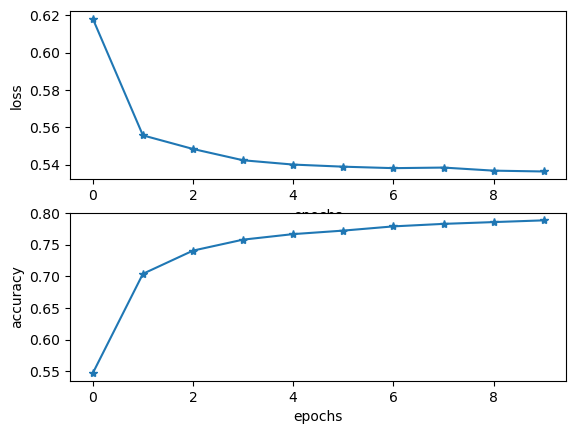

In [10]:
plt.subplot(2,1,1)
plt.plot(history.history['loss'], '*-')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'],'*-')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [20]:
# Generate reconstructions
idx = []
num_reconstructions = 4
for i in range(num_reconstructions):
    idx.append(np.random.randint(len(x_test)))

samples = x_test[idx,:,:,:]
targets = y_test[idx,:]
reconstructions = model.predict(samples)

1/1 [==============================] - 0s 34ms/step


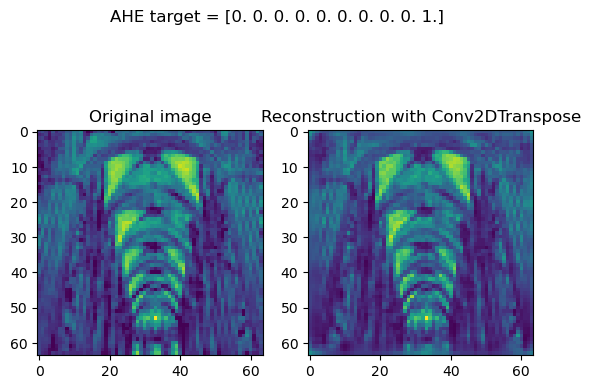

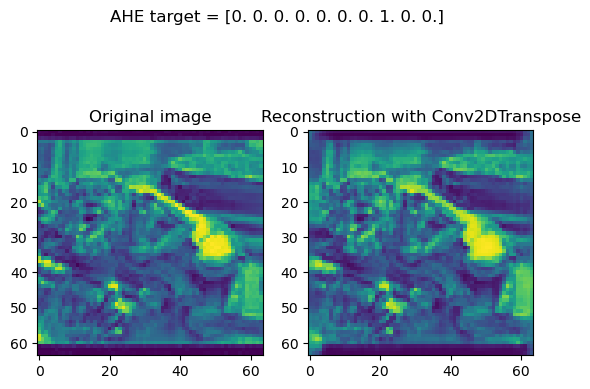

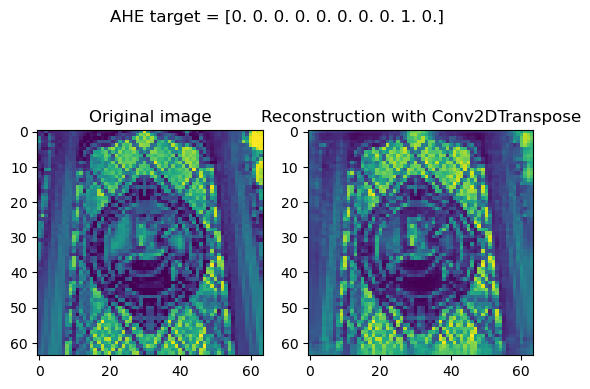

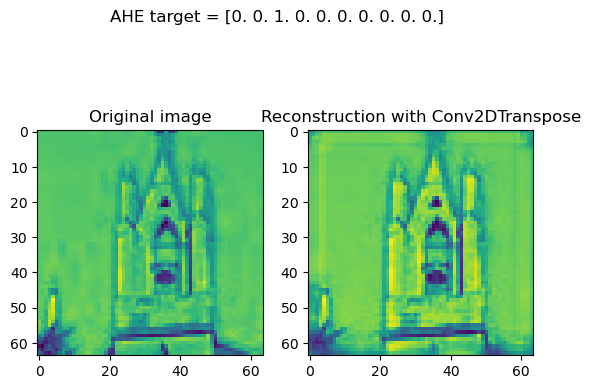

In [21]:
# Plot reconstructions
for i in np.arange(0, num_reconstructions):
  # Get the sample and the reconstruction
  sample = samples[i][:, :, 0]
  reconstruction = reconstructions[i][:, :, 0]
  input_class = targets[i]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 2)
  # Plot sample and reconstruciton
  axes[0].imshow(sample)
  axes[0].set_title('Original image')
  axes[1].imshow(reconstruction)
  axes[1].set_title('Reconstruction with Conv2DTranspose')
  fig.suptitle(f'AHE target = {input_class}')
  plt.show()